In [ ]:
import pandas as pd
import random

In [2]:
L = []
for i in range(10000):
    L.append(random.randint(1,6))

In [3]:
len(L)

10000

In [4]:
L[:5]

[3, 6, 1, 5, 5]

In [8]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

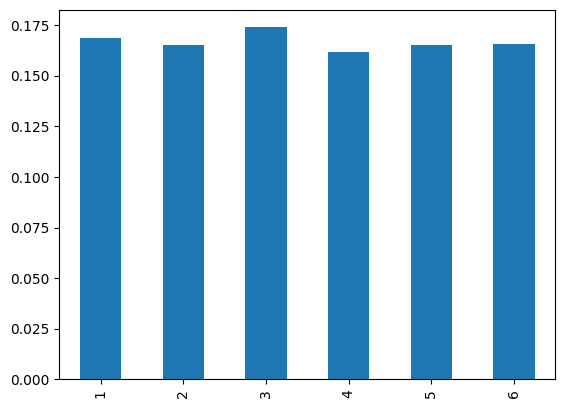

In [10]:
s.plot(kind='bar')

In [11]:
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    L.append( a + b )

In [12]:
len(L)

10000

In [13]:
L[:5]

[8, 5, 8, 4, 7]

In [ ]:
r = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

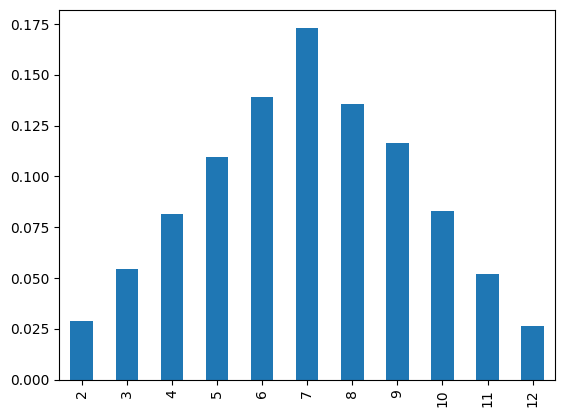

In [ ]:
r.plot(kind='bar')

# Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [ ]:
sample.mean()

In [ ]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [ ]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [ ]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)

In [ ]:
sample.max()

In [ ]:
probabilities = [dist.pdf(value) for value in values]

In [ ]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

In [ ]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [ ]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [ ]:
sample

In [ ]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [ ]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

In [ ]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [ ]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

In [ ]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

In [ ]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

In [ ]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
titanic['Age'].skew()

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

In [ ]:
titanic[titanic['Age'] > 73]

In [ ]:
titanic['Age'].max()